<a href="https://colab.research.google.com/github/anandvimal/deeplearning-experiments/blob/master/mnist_keras_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1.2 MNIST
this experiment is iteration from deep learning with keras book chapter 1

In this experiment we will use more epochs (250) as compared to 20 in last version. 

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility


Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 250         #more number of epochs this time
#NB_EPOCH = 500
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of classes(digits)
OPTIMIZER = SGD() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3        # we will use dropout to make sure model doest overfit as no of epochs we are doing are large.

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# data: shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [5]:
# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [6]:
# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
# one hot encoding
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

In [8]:
#model 
model =Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES)) #we only have 10 classes for classification
model.add(Activation('softmax'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']    
)

In [10]:
history = model.fit(
    X_train, 
    Y_train,               
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose = VERBOSE,
    validation_split=VALIDATION_SPLIT
    )


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 3s 58us/step - loss: 2.3009 - acc: 0.1165 - val_loss: 2.3007 - val_acc: 0.1060
Epoch 2/250
48000/48000 [==============================] - 2s 40us/step - loss: 2.3000 - acc: 0.1140 - val_loss: 2.3006 - val_acc: 0.1060
Epoch 3/250
48000/48000 [==============================] - 2s 40us/step - loss: 2.2998 - acc: 0.1140 - val_loss: 2.3006 - val_acc: 0.1060
Epoch 4/250
48000/48000 [==============================] - 2s 40us/step - loss: 2.2997 - acc: 0.1140 - val_loss: 2.3006 - val_acc: 0.1060
Epoch 5/250
48000/48000 [==============================] - 2s 39us/step - loss: 2.2995 - acc: 0.1140 - val_loss: 2.3006 - val_acc: 0.1060
Epoch 6/250
48000/48000 [==============================] - 2s 40us/step - loss: 2.2996 - acc: 0.1140 - val_loss: 2.3006 - val_acc: 0.1060
Epoch 7/250
48000/48000 [==============================] - 2s 40us/step - 

In [11]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)


10000/10000 [==============================] - 0s 35us/step


In [12]:
print("Test score/loss :", score[0])
print("Test accuracy: ", score[1])

Test score/loss : 0.9471671822547912
Test accuracy:  0.6755


In [13]:
#list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


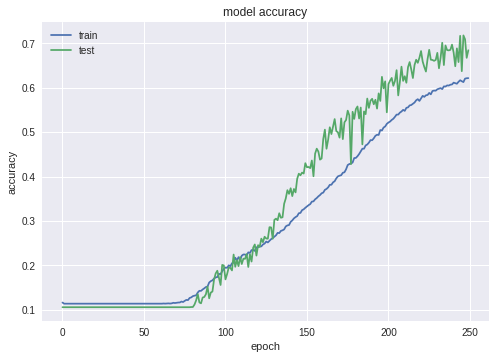

In [14]:
#plot for accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

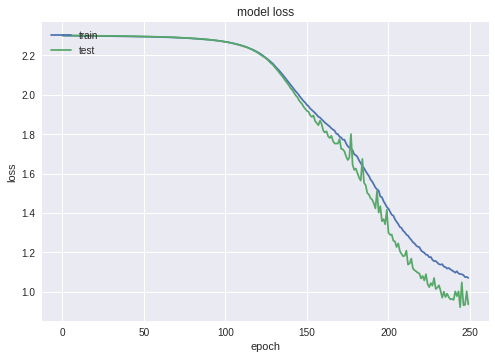

In [15]:
#plot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

we only got accuracy of 64% and loss of 1.0331 when training on 250 epochs with dropout but graph of accuracy growed linearly we might be able to get better results with more epochs here

also loss has been declining linearly so which gives us more reason to increase the number of epochs here in this case. 